In [1]:
#导入相应包
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#读取相应数据
data,label=load_svmlight_file('housing_scale')
data = data.todense()  

In [3]:
#将feature和label划分成training data和validation data
# feature_train 这是特征的训练集合
# feature_val 这是特征的测试集合
# label_train 这是标签的训练集合
# label_val 这是标签的测试集合
feature_train,feature_val,label_train,label_val = train_test_split(data,label,test_size=0.30, random_state=42)

In [4]:
#向矩阵中加入偏执项的函数
def add_bias(matrix):    
    bias = []
    #构造偏执项list
    for i in range(matrix.shape[0]):
        bias.append(1)
    #向矩阵中加入一列偏执项
    matrix = np.column_stack((matrix,bias))
    return matrix

#在特征集合中加入偏执项
feature_train = add_bias(feature_train)
feature_val = add_bias(feature_val)

In [5]:
#构造并初始化系数矩阵
w = np.random.random(size=(1,feature_train.shape[1]))

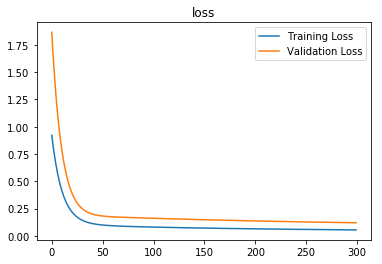

In [6]:
#梯度下降算法函数
# x 表示特征训练集
# y 表示标签训练集
# x_val 表示特征验证集
# y_val 表示标签验证集
# w 表示初始化的稀疏矩阵
# learning_rate 表示学习率
# maxiterations 表示最大迭代次数
def gradient_descent(x,y,x_val,y_val,w,learning_rate,maxiterations):
    
    #将label进行转置
    y = np.asmatrix(y)
    y = np.transpose(y)
    w = np.transpose(w)
    

    #定义迭代次数和loss值
    iteration_time = [] #迭代次数
    train_loss_value = [] #训练数据的loss值
    val_loss_value = [] #验证数据的loss值

    
    #进行迭代计算
    for i in range(0,maxiterations):
        
        #获得预测结果
        #训练集上的预测结果
        train_hypothesis = np.dot(x,w)
        #验证集上的预测结果
        val_hypothesis = np.dot(x_val,w)
        
        #求取梯度
        gradient = np.dot(np.transpose(x),train_hypothesis - y)/x.shape[0]
        

        #对系数矩阵进行更新
        w = w - learning_rate*gradient
        
        
        #定义损失函数并求出损失函数的结果
        #训练集上的loss值
        train_loss = 0
        for j in range(len(train_hypothesis)):
            train_loss = train_loss +  ((train_hypothesis[j]-y[j]).tolist()[0][0])**2
        train_loss = train_loss/(2*train_hypothesis.shape[0])
        
        
        #验证集上的loss值
        val_loss = 0
        for j in range(len(val_hypothesis)):
            val_loss = val_loss + ((val_hypothesis[j]-y_val[j]).tolist()[0][0])**2
        val_loss = val_loss/(2*val_hypothesis.shape[0])

        
        #记录迭代次数和loss的值
        iteration_time.append(i)
        train_loss_value.append(train_loss/x.shape[0])
        val_loss_value.append(val_loss/x_val.shape[0])
        
        

    
    
    #画出loss的图像
    plt.plot(iteration_time, train_loss_value , label='Training Loss')
    plt.plot(iteration_time, val_loss_value , label='Validation Loss')

    plt.title('loss')
    plt.legend()
    plt.show()
        
        
gradient_descent(feature_train,label_train,feature_val,label_val,w,0.01,300)